In [730]:
#This hw features Stepwise Regression, Lasso and Elastic Net

In [731]:
#Stepwise Regression

In [732]:
#Load the data

In [733]:
rm(list=ls())

In [734]:
data <- read.table('uscrime.txt', stringsAsFactors = FALSE, header=TRUE)

In [735]:
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [736]:
model_back <- lm(Crime~.,data = data)
#step(model_back, direction = "backward")
step(model_back, direction = "backward", trace = 0)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = data)

Coefficients:
(Intercept)            M           Ed          Po1          M.F           U1  
   -6426.10        93.32       180.12       102.65        22.34     -6086.63  
         U2         Ineq         Prob  
     187.35        61.33     -3796.03  


In [737]:
#Rerun to get p values or confidence intervals

In [738]:
#First, let's run another regression with those coefs to 
#get r squared and p values

In [739]:
model_back_selected <- lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + 
                          Ineq + Prob, data = data )

In [740]:
summary(model_back_selected)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


In [741]:
#That gives us an adjusted R-squared of 74%, but M.F isn't significant. 
#Let's run it again.

In [742]:
model_back_selected2 <- lm(Crime~M + Ed + Po1 + U1 + U2 + Ineq + 
                           Prob, data = data )

In [743]:
summary(model_back_selected2)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U1 + U2 + Ineq + Prob, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-520.76 -105.67    9.53  136.28  519.37 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5095.55     896.90  -5.681 1.43e-06 ***
M             106.78      33.18   3.218   0.0026 ** 
Ed            218.45      48.33   4.520 5.62e-05 ***
Po1           105.96      15.72   6.738 4.91e-08 ***
U1          -3542.35    3021.94  -1.172   0.2482    
U2            158.82      71.89   2.209   0.0331 *  
Ineq           66.33      13.92   4.767 2.61e-05 ***
Prob        -3730.85    1522.21  -2.451   0.0188 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 199.8 on 39 degrees of freedom
Multiple R-squared:  0.7738,	Adjusted R-squared:  0.7332 
F-statistic: 19.06 on 7 and 39 DF,  p-value: 8.805e-11


In [744]:
#Our adjusted R-sqared went down, indicating that M.F, though just 
#out of 10% range, has an influence

In [745]:
model_forward <- lm(Crime~1, data = data) 
step(model_forward, scope = formula(lm(Crime~.,data = data)),
    direction = 'forward',trace =0)


Call:
lm(formula = Crime ~ Po1 + Ineq + Ed + M + Prob + U2, data = data)

Coefficients:
(Intercept)          Po1         Ineq           Ed            M         Prob  
   -5040.50       115.02        67.65       196.47       105.02     -3801.84  
         U2  
      89.37  


In [746]:
#Rerun to get good-fit indicators

In [747]:
model_forward_selected <- lm(Crime~Po1 + Ineq + Ed + M + Prob + U2, 
                             data = data) 

In [748]:
summary(model_forward_selected)


Call:
lm(formula = Crime ~ Po1 + Ineq + Ed + M + Prob + U2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
Ineq           67.65      13.94   4.855 1.88e-05 ***
Ed            196.47      44.75   4.390 8.07e-05 ***
M             105.02      33.30   3.154  0.00305 ** 
Prob        -3801.84    1528.10  -2.488  0.01711 *  
U2             89.37      40.91   2.185  0.03483 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


In [749]:
#The forward stepwise selection chose the same variables as we previously 
#looked at when we took out M.F because it was significant only at .109

In [750]:
#Perform stepwise regression

In [751]:
model_both <- lm(Crime~., data = data)
step(model_both,
    scope = list(lower = formula(lm(Crime~1, data = data)),
                upper = formula(lm(Crime~.,data=data))),
    direction = "both",trace = 0)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = data)

Coefficients:
(Intercept)            M           Ed          Po1          M.F           U1  
   -6426.10        93.32       180.12       102.65        22.34     -6086.63  
         U2         Ineq         Prob  
     187.35        61.33     -3796.03  


In [752]:
#Rerun to see R squared 

In [753]:
model_both_selected <- lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
                          Prob, data = data)

In [754]:
summary(model_both_selected)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


In [755]:
#These is actually the same adjusted R-squared as backward 
#stepwise with R-squared 74.4%

In [756]:
#Let's compare these three when cross-validating with the caret package
#For each we'll use 4 fold cross-validation and repeat 5 times

In [757]:
set.seed(101)

In [758]:
#install.packages('klaR')

In [759]:

# load the library
library(caret)
library(klaR)

# define training control
train_control <- trainControl(method="repeatedcv", number=4, repeats=5)
# train the model
model_backwards <- train(Crime~M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, data=data, 
                         trControl=train_control, method="lm")
# summarize results
print(model_backwards)

Linear Regression 

47 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (4 fold, repeated 5 times) 
Summary of sample sizes: 36, 35, 35, 35, 35, 35, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  235.2556  0.6450194  190.2387

Tuning parameter 'intercept' was held constant at a value of TRUE


In [760]:
#We have 65% with the variables from the backwards stepwise regression

In [761]:
train_control <- trainControl(method="repeatedcv", number=4, repeats=5)
# train the model
model_forwards <- train(Crime~Po1 + Ineq + Ed + M + Prob + U2, data=data, 
                        trControl=train_control, method="lm")
# summarize results
print(model_forwards)

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (4 fold, repeated 5 times) 
Summary of sample sizes: 35, 35, 36, 35, 36, 35, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  226.0568  0.6633439  173.7372

Tuning parameter 'intercept' was held constant at a value of TRUE


In [762]:
#We get 70% cross-validating with the variables from the forwards
#stepwise regression

In [763]:
#Let's try the variables selected from choosing both in 
#the stepwise regression

In [764]:
train_control <- trainControl(method="repeatedcv", number=4, repeats=5)
# train the model
model_both <- train(Crime~Po1 + Ineq + Ed + M + Prob + U2, data=data, 
                    trControl=train_control, method="lm")
# summarize results
print(model_both)

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (4 fold, repeated 5 times) 
Summary of sample sizes: 35, 36, 35, 35, 35, 35, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  214.6358  0.7102057  160.7876

Tuning parameter 'intercept' was held constant at a value of TRUE


In [765]:
#Here it's 71%.  We have 65%,66% and 71%. I choose the variables 
#from the forward stepwise regression or both. It's important 
#to note, that comparison change each time it's run. This is 
#partially due to insufficient data.

In [766]:
#From Model 1,2,and 3, I choose model 2 because after 
#cross-validation, it maintained the highest adjusted 
#R-squared on my first seed. Of course, there isn't much 
#data, so that's a problem.

In [767]:
#Let's check AIC, AIC corrected and BIC

In [768]:
#install.packages("sme")

In [769]:
library(sme)

In [770]:
backwards_AIC <- AIC(lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + 
                        Ineq + Prob, data=data))
backwards_AIC

[1] 639.3151

In [771]:
forwards_AIC <- AIC(lm( Crime~Po1 + Ineq + Ed + M + Prob + 
                       U2, data=data ))
forwards_AIC


[1] 640.1661

In [772]:
both_AIC <- AIC(lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + 
                   Ineq + Prob, data = data))
both_AIC

[1] 639.3151

In [773]:
#From AIC, backwards and both, with same coefficients, won

In [774]:
backwards_AICc <- AICc(lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + 
                          Ineq + Prob, data=data))
backwards_AICc

[1] 645.4262

In [775]:
forwards_AICc <- AICc(lm( Crime~Po1 + Ineq + Ed + M + Prob + U2, 
                         data=data ))
forwards_AICc

[1] 643.9556

In [776]:
both_AICc <- AICc(lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
                     Prob, data = data))
both_AICc

[1] 645.4262

In [777]:
#From AIC corrected, forwards won. It penalizes complex models. 
#Forward has two less variables.

In [778]:
backwards_BIC <- BIC(lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + 
                        Ineq + Prob, data=data))
backwards_BIC

[1] 657.8166

In [779]:
forwards_BIC <- BIC(lm( Crime~Po1 + Ineq + Ed + M + Prob + U2, 
                       data=data ))
forwards_BIC

[1] 654.9673

In [780]:
both_BIC <- BIC(lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
                   data = data))
both_BIC

[1] 657.8166

In [781]:
#From BIC, forwards also won

In [782]:
#From these models .... comment ####

In [783]:
set.seed(101)

In [784]:
#install.packages("glmnet")

In [785]:
library(glmnet)

In [786]:
var1 <- data[,-2]
var2 <- var1[,-15]
scaled_data <- scale(var2)

polished_data <- cbind(scaled_data, data$So, data$Crime)
colnames(polished_data)[15]<- 'So'
colnames(polished_data)[16]<- 'Crime'



In [787]:
model_lasso <- cv.glmnet(x=as.matrix(polished_data[,-16]),
                        y=as.matrix(polished_data[,16]),
                        alpha = 1,
                        nfolds=3,
                        nlambda=20,
                        type.measure="mse",
                        family="gaussian",
                        standardize=FALSE)

In [788]:
#For Lasso, use alpha = 1. Ensure data is in matrix. For gaussian, mse 
#is a good selection for type.measure

In [789]:
#We can either scale the data before applying LASSO
#or elastic net and set standarize=FALSE, or let the function 
#do the scaling for us. WE technically do not need to scale the
#So column since it's binary, so that's a benefit of scaling it
#ourself. (Data is manually scaled here)

In [790]:
model_lasso

$lambda
 [1] 260.28146122 160.29387169  98.71669377  60.79449904  37.44018334
 [6]  23.05746985  14.19990151   8.74498391   5.38558268   3.31670144
[11]   2.04258464   1.25792209   0.77468907   0.47709088   0.29381556
[16]   0.18094579   0.11143514   0.06862713   0.04226390

$cvm
 [1] 158076.51 148922.56 138893.65 113775.95  91526.60  73993.39  68400.75
 [8]  70107.02  74495.83  79258.01  83088.52  85443.92  87136.84  88147.84
[15]  88913.59  89438.52  89778.26  89993.77  90130.54

$cvsd
 [1] 59150.581 60503.114 53734.686 31076.383 16310.288  3474.618  7218.312
 [8]  9155.235  7543.649  6682.973  6602.072  7263.589  8148.952  8922.008
[15]  9459.045  9808.385 10029.360 10167.421 10254.445

$cvup
 [1] 217227.09 209425.67 192628.33 144852.33 107836.89  77468.00  75619.06
 [8]  79262.25  82039.48  85940.99  89690.60  92707.51  95285.79  97069.85
[15]  98372.63  99246.90  99807.62 100161.19 100384.99

$cvlo
 [1] 98925.93 88419.44 85158.96 82699.57 75216.31 70518.77 61182.44 60951.78
 [9] 6

In [791]:
min(model_lasso$cvm)



[1] 68400.75

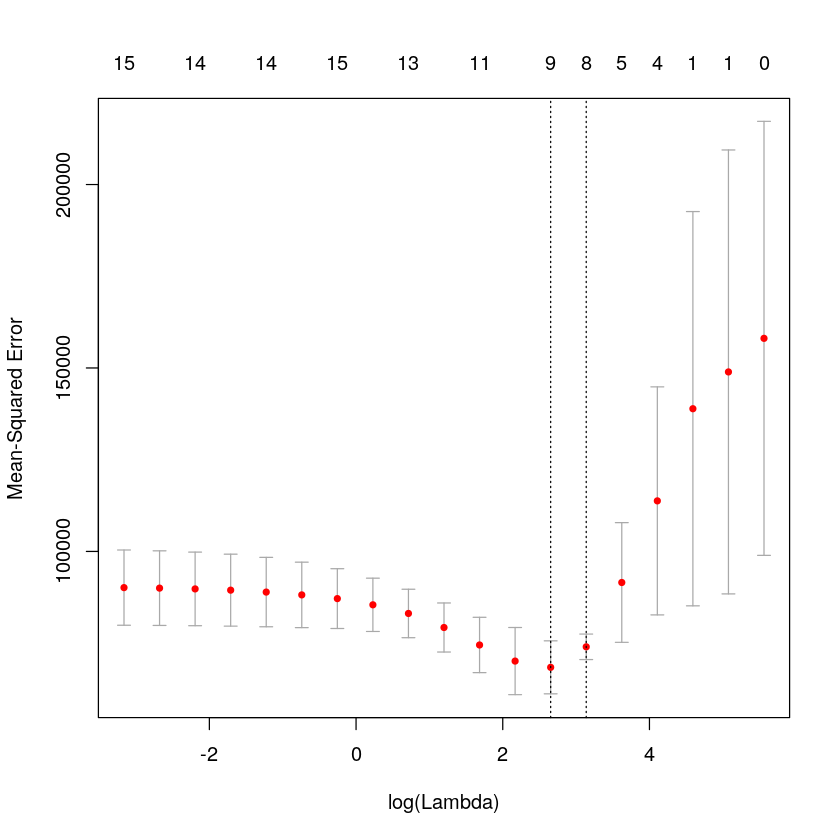

In [792]:
plot(model_lasso)

In [793]:
model_lasso$lambda.min

[1] 14.1999

In [794]:
cbind(model_lasso$lambda, model_lasso$cvm, model_lasso$nzero)
coef(model_lasso, s=model_lasso$lambda.min)

s0,260.28146122,158076.51,0
s1,160.29387169,148922.56,1
s2,98.71669377,138893.65,1
s3,60.79449904,113775.95,4
s4,37.44018334,91526.60,5
s5,23.05746985,73993.39,8
s6,14.19990151,68400.75,9
s7,8.74498391,70107.02,10
s8,5.38558268,74495.83,11
s9,3.31670144,79258.01,12
s10,2.04258464,83088.52,13


16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 905.085106
M            80.585271
Ed           99.859908
Po1         312.246311
Po2           .       
LF            .       
M.F          47.146492
Pop           .       
NW            9.318718
U1           -5.365746
U2           34.448070
Wealth        .       
Ineq        173.152039
Prob        -73.276673
Time          .       
So            .       

In [795]:
#At lambda minimum, there were 9 variables. Rerun this regression.

In [796]:
#So lasso chose 9 variables with it's budget constraint.
#Let's see what an ordinary regression looks like with these
#variables and cross-validation.

In [797]:
train_control <- trainControl(method="repeatedcv", number=4, repeats=5)
# train the model
model_lasso1 <- train(Crime~ LF + M.F + NW + Po1 + Ineq + Ed + M + Prob + U2+U1, 
                    data=data, trControl=train_control, method="lm")
# summarize results
print(model_lasso1)

Linear Regression 

47 samples
10 predictors

No pre-processing
Resampling: Cross-Validated (4 fold, repeated 5 times) 
Summary of sample sizes: 36, 35, 35, 35, 35, 35, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  238.3347  0.6447677  186.5814

Tuning parameter 'intercept' was held constant at a value of TRUE


In [798]:
# 64% is an average R-squared, and that's not even penalizing it for keeping so
#many variables. I tend to think that 9 variables is too much to maintain
#a simplistic model, especially when the R-squared is actually relatively lower.

In [799]:
mse_list <- numeric()

In [800]:
find_alpha <- function(num, polished_data){
    
    alpha <- num
    model_elasticNet_loop <- cv.glmnet(x=as.matrix(polished_data[,-16]),
                        y=as.matrix(polished_data[,16]),
                        alpha = alpha,
                        nfolds=3,
                        nlambda=20,
                        type.measure="mse",
                        family="gaussian",
                        standardize=FALSE)
    
        mse_list <<- cbind(mse_list, c(alpha, min(model_elasticNet_loop$cvm),
                                       model_elasticNet_loop$lambda.min) )
            #print(c(alpha, min(model_lasso_loop$cvm),model_lasso_loop$lambda.min ))
    
}

In [801]:
for (i in seq(.01,1,by = .01)){find_alpha(i,polished_data)}

In [802]:
mse_list

0.01000,0.02000,0.03000,0.04000,0.05000,0.06000,0.0700,0.08000,0.09000,0.10000,⋯,0.91000,0.92000,0.93000,0.940000,0.950000,0.960000,0.970000,0.980000,0.990000,1.000000
77942.54787,54276.08304,64452.05384,67965.26058,62625.93780,58069.98883,65669.4082,65255.36093,67745.54701,74882.30311,⋯,75616.83531,56089.27985,82914.62580,84677.012530,71803.756804,65873.027580,59275.574512,77988.711910,65131.844366,64962.767485
47.70909,14.69078,68.08615,19.36723,40.85169,12.91148,76.9369,41.45877,36.85224,33.16701,⋯,15.60429,15.43468,40.25826,9.303174,3.491265,5.609982,5.552147,8.923453,3.350203,8.744984


In [803]:
which.min(mse_list[2,])

[1] 90

In [804]:
minIndex <- which.min(mse_list[2,])

In [805]:
mse_list[2,minIndex]

[1] 52583.76

In [806]:
#Our minimum value for mse was when alpha was minIndex with an mse listed below:

In [807]:
minMSE <- mse_list[2,minIndex]
minMSE

[1] 52583.76

In [808]:
#So Elastic Net chose an alpha of .9. Let's look at the coefficients

In [809]:
alpha <- .9
    model_elasticNet2 <- cv.glmnet(x=as.matrix(polished_data[,-16]),
                        y=as.matrix(polished_data[,16]),
                        alpha = alpha,
                        nfolds=3,
                        nlambda=20,
                        type.measure="mse",
                        family="gaussian",
                        standardize=FALSE)

In [810]:
coef(model_elasticNet2, s=model_elasticNet2$lambda.min)

16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 905.085106
M            78.812086
Ed           97.486993
Po1         307.588426
Po2           .       
LF            .       
M.F          48.555544
Pop           .       
NW           12.081070
U1           -6.940233
U2           35.251938
Wealth        .       
Ineq        167.318242
Prob        -73.813385
Time          .       
So            .       

In [811]:
#As runs the debate, we'll do a cross-validated linear 
#regression on these 9 variables

In [812]:
# define training control
train_control <- trainControl(method="repeatedcv", 
                              number=4, repeats=5)
# train the model
chosen_by_elasticNet_model <- train(Crime~M + Ed + Po1 + M.F + 
                            NW + U1 + U2  + Ineq + Prob, 
                            data=data, trControl=train_control, method="lm")
# summarize results
print(chosen_by_elasticNet_model)



Linear Regression 

47 samples
 9 predictor

No pre-processing
Resampling: Cross-Validated (4 fold, repeated 5 times) 
Summary of sample sizes: 35, 35, 36, 35, 35, 35, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  227.0929  0.6793083  182.2647

Tuning parameter 'intercept' was held constant at a value of TRUE


In [813]:
#Likely, this is a pretty good model with a cross-validated R-squared of 66. 
#But we may still want to choose a simpler model

In [814]:
elastic_AIC <- AIC(lm( Crime~M + Ed + Po1 + M.F +NW + U1 + U2 + 
                      Wealth + Ineq + Prob, data=data ))
elastic_AIC

[1] 642.2546

In [815]:
elastic_AICc <- AICc(lm(Crime~M + Ed + Po1 + M.F +NW + U1 + U2 + Wealth + 
                        Ineq + Prob, data=data))
elastic_AICc

[1] 651.4311

In [816]:
elastic_BIC <- BIC(lm(Crime~M + Ed + Po1 + M.F +NW + U1 + U2 + Wealth + 
                      Ineq + Prob, data=data))
elastic_BIC

[1] 664.4564

In [817]:
PCA <- prcomp(data[,1:15], scale = T)

In [818]:
PC <- PCA$x[,1:6]

In [819]:
uscrimePC <- cbind(PC, data[,16])

In [820]:
uscrimePC2 <- cbind(PCA$x[,1:15], data[,16])

In [821]:
modelPCA <- lm(V7~., data = as.data.frame(uscrimePC))

In [822]:
summary(modelPCA)


Call:
lm(formula = V7 ~ ., data = as.data.frame(uscrimePC))

Residuals:
    Min      1Q  Median      3Q     Max 
-377.15 -172.23   25.81  132.10  480.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.35  25.604  < 2e-16 ***
PC1            65.22      14.56   4.478 6.14e-05 ***
PC2           -70.08      21.35  -3.283  0.00214 ** 
PC3            25.19      25.23   0.998  0.32409    
PC4            69.45      33.14   2.095  0.04252 *  
PC5          -229.04      36.50  -6.275 1.94e-07 ***
PC6           -60.21      48.04  -1.253  0.21734    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 242.3 on 40 degrees of freedom
Multiple R-squared:  0.6586,	Adjusted R-squared:  0.6074 
F-statistic: 12.86 on 6 and 40 DF,  p-value: 4.869e-08


In [823]:
#So with PCA, we can still get R-squared of 66% with only 6 variables

In [824]:
#Let's use lasso on PCA data

In [825]:
model_Lasso_pca <- cv.glmnet(x=as.matrix(uscrimePC2[,1:15]),
                        y=as.matrix(uscrimePC2[,16]),
                        alpha = 1,
                        nfolds=3,
                        nlambda=20,
                        type.measure="mse",
                        family="gaussian",
                        standardize=FALSE)

In [826]:
#What's unclear is what to do to interpret this data

In [827]:
summary(model_Lasso_pca)

           Length Class  Mode     
lambda     19     -none- numeric  
cvm        19     -none- numeric  
cvsd       19     -none- numeric  
cvup       19     -none- numeric  
cvlo       19     -none- numeric  
nzero      19     -none- numeric  
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

In [828]:
coef(model_Lasso_pca, s=model_Lasso_pca$lambda.min)

16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept)  905.08511
PC1           61.65801
PC2          -62.43997
PC3           14.51302
PC4           51.01995
PC5         -206.69600
PC6          -21.50185
PC7           50.71243
PC8            .      
PC9            .      
PC10           .      
PC11           .      
PC12         122.55728
PC13           .      
PC14           .      
PC15           .      

In [829]:
scaled_data <- as.data.frame(scaled_data)

In [830]:
#This just in. The below regression is advised by method=leapSeq. 
#See further below for more details

In [831]:
mod <- lm(Crime ~ Ed + Po1 + Ineq, data = data )

In [832]:
summary(mod)


Call:
lm(formula = Crime ~ Ed + Po1 + Ineq, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-590.30 -102.06   -1.73  129.16  511.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3275.41     769.14  -4.259  0.00011 ***
Ed            157.87      47.66   3.312  0.00188 ** 
Po1           124.31      14.79   8.408 1.26e-10 ***
Ineq           75.06      15.08   4.978 1.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 231.3 on 43 degrees of freedom
Multiple R-squared:  0.6656,	Adjusted R-squared:  0.6423 
F-statistic: 28.53 on 3 and 43 DF,  p-value: 2.59e-10


In [833]:
scaled_data <- cbind(scaled_data,data[16])

In [834]:
#install.packages('leaps')

In [835]:
library(leaps)

In [836]:
#Let's use a leap sequence

In [837]:
control <- trainControl(method = "repeatedcv", number = 5, repeats = 5)

In [838]:
lm_step <- train(Crime ~., data = data, method = "leapSeq", 
                     tuneGrid = data.frame(nvmax = 1:15), trControl = control)

In [839]:
summary(lm_step)

Subset selection object
15 Variables  (and intercept)
       Forced in Forced out
M          FALSE      FALSE
So         FALSE      FALSE
Ed         FALSE      FALSE
Po1        FALSE      FALSE
Po2        FALSE      FALSE
LF         FALSE      FALSE
M.F        FALSE      FALSE
Pop        FALSE      FALSE
NW         FALSE      FALSE
U1         FALSE      FALSE
U2         FALSE      FALSE
Wealth     FALSE      FALSE
Ineq       FALSE      FALSE
Prob       FALSE      FALSE
Time       FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: 'sequential replacement'
         M   So  Ed  Po1 Po2 LF  M.F Pop NW  U1  U2  Wealth Ineq Prob Time
1  ( 1 ) " " " " " " "*" " " " " " " " " " " " " " " " "    " "  " "  " " 
2  ( 1 ) " " " " " " "*" " " " " " " " " " " " " " " " "    "*"  " "  " " 
3  ( 1 ) " " " " "*" "*" " " " " " " " " " " " " " " " "    "*"  " "  " " 
4  ( 1 ) "*" "*" "*" "*" " " " " " " " " " " " " " " " "    " "  " "  " " 
5  ( 1 ) "*" " " "*" "*" " " " " " " " " " " "

In [840]:
#The grid says if we try 3 variables, they should be Po1, Ed and Ineq

In [841]:
mod2 <- lm(Crime ~ Ed + Po1 + Ineq, data = scaled_data )
summary(mod2)


Call:
lm(formula = Crime ~ Ed + Po1 + Ineq, data = scaled_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-590.30 -102.06   -1.73  129.16  511.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      33.74  26.825  < 2e-16 ***
Ed            176.61      53.32   3.312  0.00188 ** 
Po1           369.45      43.94   8.408 1.26e-10 ***
Ineq          299.45      60.15   4.978 1.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 231.3 on 43 degrees of freedom
Multiple R-squared:  0.6656,	Adjusted R-squared:  0.6423 
F-statistic: 28.53 on 3 and 43 DF,  p-value: 2.59e-10


In [842]:
#Mind-blowing ###  We really only needed 3 variables

In [843]:
leap_AIC <- AIC(lm(Crime~Ed + Po1 + Ineq, data=data))
leap_AIC

[1] 650.9145

In [844]:
leap_AICc <- AICc(lm(Crime~Ed + Po1 + Ineq, data=data))
leap_AICc

[1] 652.3779

In [845]:
leap_BIC <- BIC(lm(Crime~Ed + Po1 + Ineq, data=data))
leap_BIC

[1] 660.1652

In [846]:
# Very comparable AIC and BIC to earlier models!